# Baseline For San Francisco Crime Classification
Yang Yang Qian

https://www.kaggle.com/c/sf-crime

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Load Data

In [12]:
train_pd = pd.read_csv("../data/raw/train.csv.zip", compression="zip")
test_pd = pd.read_csv("../data/raw/test.csv.zip", compression="zip")
sample_submissions = pd.read_csv("../data/raw/sampleSubmission.csv.zip", compression="zip")

# EDA

In [140]:
# submission should have the same number of rows as the test data
print(train_pd.shape)
print(test_pd.shape)

(878049, 9)
(884262, 7)


In [144]:
# Category and Description columns in train data, but not test data
train_pd.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [145]:
test_pd.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [148]:
# submissions need to be 40 columns, 1 Id column + 39 category columns
sample_submissions.shape

(884262, 40)

In [14]:
sample_submissions.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [146]:
train_pd.describe(include = "all")

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


In [147]:
test_pd.describe(include = "all")

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
count,884262.000000,884262,884262,884262,884262,884262.000000,884262.000000
unique,NaN,392173,7,10,23184,NaN,NaN
top,NaN,2010-01-01 00:01:00,Friday,SOUTHERN,800 Block of BRYANT ST,NaN,NaN
freq,NaN,150,134703,157456,26984,NaN,NaN
mean,442130.500000,NaN,NaN,NaN,NaN,-122.422693,37.771476
std,255264.596206,NaN,NaN,NaN,NaN,0.030985,0.484824
min,0.000000,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,221065.250000,NaN,NaN,NaN,NaN,-122.433069,37.752374
50%,442130.500000,NaN,NaN,NaN,NaN,-122.416517,37.775421
75%,663195.750000,NaN,NaN,NaN,NaN,-122.406959,37.784353


In [9]:
np.sort(pd.unique(train_pd.Category))

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [10]:
len(pd.unique(train_pd.Category))

39

In [11]:
train_pd["Category"].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

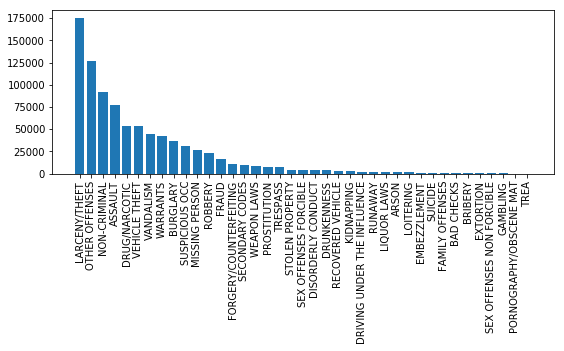

In [166]:
cts = train_pd["Category"].value_counts()
idx = np.arange(0, len(cts))
plt.figure(figsize = (9, 3))
plt.bar(idx, cts)
plt.xticks(idx, cts.index, rotation='vertical')
plt.show()

# Classify

In [129]:
# shuffles, then splits into train and dev sets
shuffled = train_pd.sample(frac=1)
split = round(train_pd.shape[0] * 0.8)
train_data = shuffled[:split]
dev_data = shuffled[split+1:]

print(split)
print(train_data.shape)
print(dev_data.shape)

# splits the labels from the features
# please note we are only using the raw coordinates features 
features = ["X", "Y"]
train_features = train_data[features]
train_labels = train_data["Category"]

dev_features = dev_data[features]
dev_labels = dev_data["Category"]

test_features = test_pd[features]

print(train_features.shape)
print(train_labels.shape)
print(dev_features.shape)
print(dev_labels.shape)
print(test_features.shape)

702439
(702439, 9)
(175609, 9)
(702439, 2)
(702439,)
(175609, 2)
(175609,)
(884262, 2)


In [130]:
# uses a simple knn
clsfr = KNeighborsClassifier(n_neighbors = 3)
clsfr.fit(train_features, train_labels)

# checks basic accuracy
clsfr.score(dev_features, dev_labels)

0.19360625024913303

In [131]:
# makes predictions against our test data
preds = clsfr.predict(test_features)
predsproba = clsfr.predict_proba(test_features)

In [132]:
print(type(preds))
print(preds[0:3])

<class 'numpy.ndarray'>
['DRUG/NARCOTIC' 'ASSAULT' 'BURGLARY']


In [133]:
# we probably want to use the knn classifier's predict_proba to construct our submission
print(type(predsproba))
print(predsproba[0:3])

<class 'numpy.ndarray'>
[[0.         0.         0.         0.         0.         0.
  0.         0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.33333333 0.         0.         0.
  0.         0.33333333 0.        ]
 [0.         0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.33333333]
 [0.         0.         0.         0.         0.33333333 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.

In [134]:
# converts predicted probabilities into submission panda
cols = np.sort(pd.unique(train_pd.Category))
submissions = pd.DataFrame(data = predsproba, columns = cols)

# rounds any floats to less precision
submissions= submissions[cols].round(2)

# adds an Id column
idx = np.arange(0, len(predsproba))
submissions.insert(loc = 0, column = "Id", value = idx.tolist())

In [135]:
submissions.shape

(884262, 40)

In [136]:
submissions.head(10)

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.33,0.0,...,0.0,0.0,0.0,0.33,0.0,0.0,0.00,0.00,0.33,0.00
1,1,0.0,0.33,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.33
2,2,0.0,0.00,0.0,0.0,0.33,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.33,0.00,0.00
3,3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.33
4,4,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.33
5,5,0.0,0.33,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00
6,6,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.67,0.0,0.0,0.00,0.00,0.00,0.00
7,7,0.0,0.00,0.0,0.0,0.67,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00
8,8,0.0,0.33,0.0,0.0,0.00,0.0,0.0,0.33,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.33
9,9,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.33,0.33,0.00,0.00


In [137]:
# checks submission has the correct number of rows and columns
assert(sample_submissions.shape[0] == submissions.shape[0])
assert(sample_submissions.shape[1] == submissions.shape[1])

# Save Submissions to Disk

In [138]:
submissions.to_csv("../data/processed/submission.csv.gz", index = False, compression = "gzip")